# Python Tutorial

In [ ]:
#Placing Side by side Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

def SideImage(Img1, Img2):
    rcParams['figure.figsize'] = 11 ,8
    img_A = mpimg.imread(Img1)
    img_B = mpimg.imread(Img2)

    # display images fig, 
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[0].axis('off') 
    ax[1].imshow(img_B)
    ax[1].axis('off')
    return ax

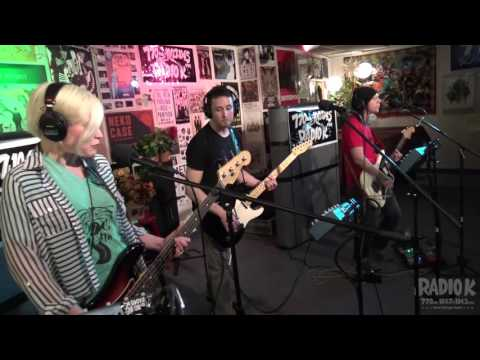

In [35]:
from IPython.display import YouTubeVideo

YouTubeVideo('Fh3QDMbGTwM', width=800, height=450)

## Loading data 

### Standard Approach

In [4]:
#Step 1 Load programs and extract data from Excel file 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import json
from urllib.request import urlopen
from IPython.display import HTML
from IPython.display import display
import requests # library to handle requests

# Displays up to 30 columns
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)

x= pd.read_csv('data/samp_data.csv')

x.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


### Other (Don't Run)

In [50]:
#Download Excel of specific sheet
#x = pd.read_excel(r"e.xlsx", sheet_name="Site List")

#Socarata upload Method
from sodapy import Socrata
#New Upload Method Get Information from Socrata API
client = Socrata("data.ramseycounty.us", None)
#Easier to bulk upload; notice the specficiations
results = client.get("dmvd-tktr",tax_year="2020", limit=1000000)
df = pd.DataFrame.from_records(results)


#Load from API
json_file = "https://services.arcgis.com/afSMGVsC7QlRK1kZ/arcgis/rest/services/Active_Rental_Licenses/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
data = urlopen(json_file).read()
raw_json = json.loads(data)
formatted_json = [feature['attributes'] for feature in raw_json['features']]
ef = pd.DataFrame(formatted_json)

## Viewing Data

In [11]:
print(x.dtypes) #display datatypes
print(x.shape) #display dimensionality and max rows-13580
print(x.head(5)) #display first 5
# x.tail(5) #display last 5
print(x.SellerG.describe())

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
(13580, 21)
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Da

### Data Validation

In [13]:
#Scanned each column for the variance; removed columns that have one value greater 90% 
for col in x.columns:
    if x[col].dtype == "object":
        print(x[col].value_counts()/13580) #Note 13580 is the max rows for that dataset


Suburb
Reservoir         0.026436
Richmond          0.019146
Bentleigh East    0.018336
Preston           0.017599
Brunswick         0.016348
                    ...   
Sandhurst         0.000074
Bullengarook      0.000074
Croydon South     0.000074
Montrose          0.000074
Monbulk           0.000074
Name: count, Length: 314, dtype: float64
Address
36 Aberfeldie St    0.000221
2 Bruce St          0.000221
5 Charles St        0.000221
53 William St       0.000221
14 Arthur St        0.000221
                      ...   
16 Alleford St      0.000074
2/1073 Centre Rd    0.000074
14 Columbia St      0.000074
21 Hardy Ct         0.000074
6 Agnes St          0.000074
Name: count, Length: 13378, dtype: float64
Type
h    0.695803
u    0.222165
t    0.082032
Name: count, dtype: float64
Method
S     0.664359
SP    0.125405
PI    0.115169
VB    0.088292
SA    0.006775
Name: count, dtype: float64
SellerG
Nelson           0.115243
Jellis           0.096907
hockingstuart    0.085935
Barry         

In [27]:
#Scanned for missing values of each column
missval= x.isnull()
for column in missval.columns.values.tolist(): #shows all the missing values
    print(column)
    print (missval[column].value_counts())
    print("")  

# the data with missing Car Values
x[x.Car.isna()==1] #select the Null values that display false
#Alternative Approach
#x.dropna(axis=0, subset=['Car'], inplace=True)


# Using Car: if they are EMPTY then we are filling them with other value (can be another column)
x.Car= np.where(x.Car.isnull(), 'Convertible' , x.Car) 

#replace missing values with something
x.fillna(0)

Suburb
Suburb
False    13580
Name: count, dtype: int64

Address
Address
False    13580
Name: count, dtype: int64

Rooms
Rooms
False    13580
Name: count, dtype: int64

Type
Type
False    13580
Name: count, dtype: int64

Price
Price
False    13580
Name: count, dtype: int64

Method
Method
False    13580
Name: count, dtype: int64

SellerG
SellerG
False    13580
Name: count, dtype: int64

Date
Date
False    13580
Name: count, dtype: int64

Distance
Distance
False    13580
Name: count, dtype: int64

Postcode
Postcode
False    13580
Name: count, dtype: int64

Bedroom2
Bedroom2
False    13580
Name: count, dtype: int64

Bathroom
Bathroom
False    13580
Name: count, dtype: int64

Car
Car
False    13518
True        62
Name: count, dtype: int64

Landsize
Landsize
False    13580
Name: count, dtype: int64

BuildingArea
BuildingArea
False    7130
True     6450
Name: count, dtype: int64

YearBuilt
YearBuilt
False    8205
True     5375
Name: count, dtype: int64

CouncilArea
CouncilArea
False    12211


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,3.0,1.0,NaN,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,2.0,1.0,NaN,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,3.0,2.0,NaN,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,3.0,1.0,NaN,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,4.0,1.0,NaN,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,4.0,3.0,NaN,233.0,NaN,NaN,NaN,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,2.0,1.0,NaN,100.0,67.0,1890.0,NaN,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,2.0,2.0,NaN,197.0,NaN,NaN,NaN,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,2.0,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0


In [33]:
# Check for duplicates across all columns
duplicates = x.duplicated()
#duplicates = x.duplicated(subset=['Car', 'Type'])

# View the duplicate rows
print(x[duplicates])

# Drop duplicates and keep the first occurrence
x = x.drop_duplicates()

# Drop duplicates and keep the last occurrence
x = x.drop_duplicates(keep='last')

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []


In [25]:
#The number of unique values for each column; can scan for unique ID
print(x.nunique()) 

#Check for uniqueness of column
print(x.Type.is_unique) # if say false then duplicate
print(x.Type.value_counts()) #gives group frequency
x.Suburb.str.contains('Rich').value_counts() #checks column contain string Miss, and distribution of Boolean

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64
False
Type
h    9449
u    3017
t    1114
Name: count, dtype: int64


Suburb
False    13320
True       260
Name: count, dtype: int64

In [ ]:
#Extra Code

#Action- Find the duplicate values; Index method to use group_by sum
test_x= x.assign(Index=1)
p=['StudentID', 'Index']
c= test_x[p].groupby(['StudentID',]).sum().reset_index() #group by sum; reset index allows for result be dataframe
#c.rename(columns={'Index':'Count'}, inplace=True)
c.sort_values(by=['Index'])
#Next Step- Remove the values via query that don't meet names.


## DataBase Manipulation

In [ ]:
#selecting specific columns of dataframe and order
p= ['Car', 'Type']
a= x[p]

#Renaming All Coloumns
a.columns= ['SourceSiteID','ProgramName']

#rename few columns
a.rename(columns={'SourceSiteID':'Car2'},inplace= True)

#drop columns
x.drop('Char_Num', axis=1)

#Change Datatypes of many columns
df = df.astype({"District": float, "Vacant_Building_Category": int, "Ward":float, "Census_Tract":float})

#Remove first 4 columns
df=df.iloc[:,4:]


## Merging Databases (Dont Run)

In [ ]:
#merge datatables (including fidning missing data)
x_m= pd.merge(x1, x2, on='SourceSiteID', how='right') 
x_m[x_m.address_x.isnull()] #141 missing hits; address_X is from Parcel data
k1=x_m[x_m.address_x.notnull()] #Save matched hits

#Merge New group data by primary index; Example voterID is being added
df_SP=df_SP.reset_index()
com_SP=sp_voter.set_index('VoterId').join(df_SP.set_index('VoterId'))

#stack datatables
xFin=pd.concat([key1,key3,key2], ignore_index=True) #combine values

# create Output
x_out.to_csv('Edu_DataExercise.csv', index=False)

## Data Manipulation (Selection)

In [ ]:
## NOTE: inplace= TRUE argument makes it where you don't need a new dataframe to save ; x.query('country==usa', inplace=TRUE)
## NOTE: you can use .filter() options to select the columns after a query; 
## NOTE: you can use .sort_values(by=['col1','col2']) options to sort the table after query
## Note: math operations can be done on columns such as multiply numerical columns

#selecting first 10 entries
x.iloc[:10]

#Choosing multiple indices
indice= [1,2,3,5,8]
x.loc[indice]

# choosing specific indices and columns
indice= [0,1,10,100]
cols= ['country','province','region_1','region_2']
df = reviews.loc[indice,cols]

# selecting a single single cell by row and column location
x.iat[0,1] #first row, second column entry

# Selecting subset of data based on specific value
x.query('country==usa') #single value 
x.query('"country" == ["brazil","poland","russia","countrydummy","usa"]' ) #multiple values in same column ; in is another option
##Alternative method below creating a global list
p= ["brazil","poland","russia","countrydummy","usa"]
x.query('country == @p]')

x.query('not Bool_col') # this selects the "False" values of the column

# Select on multiple conditions on values
x.query('colA> 5 and colB<3') # the denotion of ampersand (&) can work too 
x.query('colA> 5 & colB<3') # equivalent to above
x.query('colA> 5 | colB<3') # this is the OR condition

# Change specifc values
fg.CallDisposition.loc[(fg['CallDisposition'] == 'G - Gone on Arrival')] = 'Gone on Arrival'

#Comparison of two numerical columns
x.query('colA> colB')

#Removing a data entry with specific value
x=x.query('col!=966454')

# Using applicant phone number: if they are EMPTY then we are filling them with owner's Info
x.AppPhone= np.where(x.AppPhone.isnull(), x.ownerPhone , x.AppPhone) 



## Data Manipulation (Creation)

## Create Functions

In [ ]:


# Single Function action
def demo(x):
    if x in ['A','3']: #=='A' | x=='3':
        return 'HISPANIC'
    elif x in ['G','7']: #x=='G' |x=='7':
        return 'MULTIRACIAL'
    else:
        return x


# create a function that use loops to change numerical to month name
def Convert_Month(num):
    Months= ['January','February','March','April','May','June','July','August','September','October','November','December']
    for i in range(12):
        if num==(i+1):
            Xi=Months[i]
    return Xi 


x.Demo= x.Ethnicity.apply(demo) #apply function

# TEST: Multiple Function creation would test
def double(x,y):
    if x in ['A','3'] and y== 5: #=='A' | x=='3':
        return 'HISPANIC'
    elif x in ['B','1']: #x=='B' |x=='1':
        return 'blah'
    else:
        return x

x.DemoMult= x.apply(lambda y: double(y.colA, y.colB), axis=1)

#The lambda method of function creation might be good for numerical operations    

#While scanning the data I noticed that all intersections had "&" 
df['Intersection'] = df['Block'].apply(lambda x: 1 if '&' in x else 0) #intersection

#Alternative to Simple Function                    
#Function to replace value based on condition
 np.where(ren['add6'] == ren['oadd6'], 1, 0) # if true, then Value One else 0

#Create a dummy for each crime category
fg= pd.concat([fg,pd.get_dummies(fg['Incident'])], axis=1)

#Replace variables with dummies
df['Driver_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Vehicle_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #FEMALE is 1

## Operations

In [ ]:

#Create New columns with conditions
x.NCol= [1] #index column

# Change data types and manipulate
x.numcol.astype(str).str[:4].astype('float64')

# The percentage of Rental Property Units by Property Type
d=(MS1['Property_Type'].value_counts()*100/21404).round(2).reset_index().query("Property_Type>1") 

# The percent of Owners by total number of residential units owned LIMITED to top 4
g=(Owl['licensedUnits'].value_counts()*100/ 17611).round(2).nlargest(4).reset_index()
g.rename(columns={'index':'Total_Licensed_Units', 'licensedUnits': 'Owner_Percent'}, inplace=True)

#kaggle Examples: Group by Price and find the max points and have that sorted
best_rating_per_price = reviews.groupby('price')['points'].max().sort_index()


### String Manipulation

In [ ]:
## String Manipulation
x.col.str.contains('Miss')== True #selects strings that are true
x[~x.col.str.contains('demo', regex=False)] #NOTE that ~ selects the False values of Boolean; could be alternative to above

x.col.str.title() #convert to title
x.col.str.len() #fidn string length
x.col.str[:5]
x.col.str.replace('-',' ',inplace=True)  #replace
x.col.str.strip() #remove whitespace
x.col.astype(np.int64)

## Get Coordinates

In [ ]:
# Separatign Coordinate Values
# Get Coordinates by converting to string
df['Coordinates'] = df['Coordinates'].astype('str') 
new=df['Coordinates'].str.split("', '", n = 1, expand = True) 

# get Latitude:
lat=new[0].str.split(" '", n = 1, expand = True)
df['Latitude']= pd.to_numeric(lat[1]) 

#Get Longtitude
new= new[1].str.split("', '", n = 1, expand = True)
long=new[0].str.split(" '", n = 1, expand = True)
df['Longitude']= pd.to_numeric(long[1]) 


## Converting to DateTime

In [ ]:
#Convert Date to Datetime!
from datetime import datetime

df['DateTime']= pd.to_datetime(df['Date']) # Create new column called DateTime
df['Year']= df['DateTime'].dt.year #create year column
df['DayofWeek']=df['DateTime'].dt.dayofweek #create day of the week column where default 0=Monday
df['Weekend'] = df['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0) #Create a weekend category
df['Month'] = df['DateTime'].dt.month # Create Month Category
df['Day'] = df['DateTime'].dt.day #Create Day of the Current month
df['DayYear'] = df['DateTime'].dt.dayofyear  #Create Day of the year (0-365)
df['Day_Max'] = df.iloc[0,-1] #selects uptodate day; NOTE: the data is sorted chronologically

#Getting Today's Day of Year
todays_date = pd.Timestamp.today() 
day_of_year = todays_date.dayofyear
df['toDate']= day_of_year

# Getting Select Date for Day of Year
def date_to_dayofyear(date_str):
    """Converts a date string to the day of the year."""

    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    return date_obj.timetuple().tm_yday

# Example usage
date_str = "2024-09-10"
day_of_year = date_to_dayofyear(date_str)
df['toDate']= date_to_dayofyear(date_str)


#Hour Data
df['TimeHour']= pd.to_datetime(df['Time'])
df['Hour'] = df['TimeHour'].dt.hour.astype(int) #Create Hour Colum
df['LateNight'] = df['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0) #Latenight designation from 10Pm to 6PM

## Pivot Table

In [51]:
#Pivot Table

df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'A', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't'],
                   'type': ['boy', 'girl', 'boy', 'girl', 'boy','girl']
                  })

print(df)

#Pivot operation; default is mean
print(df.pivot_table(index='foo', columns='bar', values='baz',fill_value=0))

# double selection
piv=df.pivot_table(index=['type','foo'], columns='bar', values='baz',fill_value=0).reset_index()

# Print with formatting
print(piv.to_string(float_format='{:.2f}'.format))

from tabulate import tabulate

print(tabulate(piv, headers='keys', tablefmt='psql'))

   foo bar  baz zoo  type
0  one   A    1   x   boy
1  one   A    2   y  girl
2  one   C    3   z   boy
3  two   A    4   q  girl
4  two   B    5   w   boy
5  two   C    6   t  girl
bar    A    B    C
foo               
one  1.5  0.0  3.0
two  4.0  5.0  6.0
bar         A    B    C
type foo               
boy  one 1.00 0.00 3.00
     two 0.00 5.00 0.00
girl one 2.00 0.00 0.00
     two 4.00 0.00 6.00
+-----------------+-----+-----+-----+
|                 |   A |   B |   C |
|-----------------+-----+-----+-----|
| ('boy', 'one')  |   1 |   0 |   3 |
| ('boy', 'two')  |   0 |   5 |   0 |
| ('girl', 'one') |   2 |   0 |   0 |
| ('girl', 'two') |   4 |   0 |   6 |
+-----------------+-----+-----+-----+


In [ ]:

# pivot table function
def table_toDate_Month_Crime(Incident='All',Day=Max):
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    Date= fgc[(fgc['DayYear'] == Day)]['FDate'][0:1].iloc[0,]
    B= B[(B['DayYear'] <= Day)]
    B=B.query('Year >= 2017')
    Index= ['Year','Grid','Count','Month']
    C= B[Index].groupby(['Year','Grid','Month']).sum().reset_index()
    C['Month_Name']= C.Month.apply(Convert_Month) 
    C['Community']= C.Grid.apply(commun)
    print('This table maps {} incidents up to Day {}20XX'.format(Incident,Date))
    return pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Month', 'Year'], fill_value=0)

In [71]:
import pandas as pd
import numpy as np
# create a random sample DataFrame
names = ['John', 'Mary', 'Joe', 'Mike', 'Sara', 'Peter', 'Amy', 'Tom', 'Lisa', 'Dan']
subjects = ['Math', 'Science', 'English', 'History', 'Art', 'Music', 'Gym', 'Geography']
name_list = []
subject_list = []
grade_list = []
for name in names:
    num_subjects = np.random.randint(4, 9)  # choose a random number of unique subjects between 4 and 8
    subject_choices = np.random.choice(subjects, size=num_subjects, replace=False)  # choose the unique subjects
    for subject in subject_choices:
        grade = np.random.choice(['A', 'B', 'C', 'D', 'F'], p=[0.2, 0.3, 0.3, 0.1, 0.1])  # choose a random grade
        name_list.append(name)
        subject_list.append(subject)
        grade_list.append(grade)
data = {'Name': name_list, 'Subject': subject_list, 'Grade': grade_list}
df = pd.DataFrame(data)
# add a Score column based on the Grade column
def get_score(grade):
    if grade == 'A':
        return np.random.randint(80, 101)
    elif grade == 'B':
        return np.random.randint(70, 80)
    elif grade == 'C':
        return np.random.randint(60, 70)
    elif grade == 'D':
        return np.random.randint(50, 60)
    else:
        return np.random.randint(0, 50)
df['Score'] = df['Grade'].apply(get_score)

In [73]:
df

,Name,Subject,Grade,Score
0,John,Gym,B,72
1,John,Music,D,51
2,John,English,A,90
3,John,History,A,88
4,Mary,Gym,B,75
...,...,...,...,...
58,Dan,History,D,56
59,Dan,Geography,F,30
60,Dan,English,C,67
61,Dan,Music,C,62


In [99]:
#pivot example
pivoted_df = df.pivot(index='Name', columns='Subject', values=['Score']).reset_index()
print(pivoted_df)

pivoted_df1 = df.pivot_table(index='Subject', values=['Score'], aggfunc={'Score': np.mean}).reset_index()
print(pivoted_df1)

#mean is default
pivoted_df2 = df.pivot_table(index='Subject', values=['Score']).reset_index()
print(pivoted_df2)

          Name Score                                                    
Subject          Art English Geography   Gym History  Math Music Science
0          Amy  75.0    51.0      77.0  61.0    93.0  57.0  74.0    61.0
1          Dan  73.0    67.0      30.0  73.0    56.0  34.0  62.0     NaN
2          Joe  97.0    61.0       NaN  96.0    78.0   9.0  61.0    75.0
3         John   NaN    90.0       NaN  72.0    88.0   NaN  51.0     NaN
4         Lisa  64.0    79.0      99.0   NaN   100.0  16.0   NaN    78.0
5         Mary  72.0    83.0      73.0  75.0     NaN  61.0  76.0     NaN
6         Mike  60.0    77.0       NaN   NaN    62.0  75.0  66.0    72.0
7        Peter  19.0    90.0      84.0  56.0    59.0   NaN  73.0    73.0
8         Sara   NaN    70.0      61.0  61.0    86.0  75.0  23.0    60.0
9          Tom  76.0     NaN      85.0  79.0     NaN   NaN  96.0    83.0
     Subject      Score
0        Art  67.000000
1    English  74.222222
2  Geography  72.714286
3        Gym  71.625000
4   

In [ ]:
#Collapse the MultiIndex
pivoted_df.columns = pivoted_df.columns.map(' '.join).str.strip()
#Reset Index to get the Name column back
pivoted_df = pivoted_df.reset_index()
# Melt the pivoted DataFrame
melted_df = pd.melt(pivoted_df, id_vars=['Name'], var_name=['Subject'], value_name='Score')
# rename to remove the collapsed MultiIndex prefixabs
melted_df.Subject = melted_df.Subject.str.split(' ').str[1]
print(melted_df)

In [103]:
pivoted_df.columns = pivoted_df.columns.map(' '.join).str.strip()
pivoted_df = pivoted_df.reset_index()
pd.melt(pivoted_df, id_vars=['Name'], var_name=['Subject'], value_name='Score')

ValueError: var_name=['Subject'] must be a scalar.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating plt pie plot
fig = plt.figure(figsize=(10, 7))
plt.pie(d.Count, labels=d.Demographic, autopct='%1.0f%%')
plt.title("Fig. 1: NYC PK & 3K Students Demographic Breakdown [19396 students]")
# show plot
plt.show()

# Creating plt horizontal bar plot
plt.barh(data.Borough, data.HousingInsecure_Percent)
plt.title("Fig. 3: Rate of Housing Insecurity for NYC PK and 3k students by Borough")
plt.xlabel('Percent')
plt.show()

# Seaborn bar graph (Group by twice)
sns.set()
pd.pivot_table(g, values='Count', index=['Borough'], columns=['Demographic'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= 'Fig 1.1: NYC PreK Students Demographic Breakdown by Borough')
plt.legend(fontsize=10)
plt.xlabel ('Students')
plt.show()



### Census URL Generator

In [ ]:
#This is the url setup
#Top-Half
Host='https://data.census.gov/cedsci/map?t=Housing%20Units&g=1400000US' 

#Select census tracts
#Minneapolis is broken to two tracts areas
Mpls_East='27053000600,27053002200,27053002700,27053003200,27053003300,27053005901,27053005902,27053006800,27053007700,27053007801,27053008100,27053008200,27053008300,27053008400,27053008500,27053009500,27053009600,27053010600,27053010700,27053011000,27053011703,27053011704,27053011800,27053011998,27053012001,27053012003,27053012101,27053012102,27053101300,27053101600,27053102000,27053102100,27053102800,27053103400,27053104100,27053104400,27053104801,27053104802,27053105100,27053105201,27053105204,27053105400,27053105500,27053105600,27053105700,27053106000,27053106200,27053106400,27053106500,27053106600,27053106700,27053106900,27053107000,27053107400,27053107500,27053107600,27053108000,27053108600,27053108700,27053108800,27053108900,27053109000,27053109100,27053109200,27053109300,27053109400,27053109700,27053109800,27053109900,27053110000,27053110100,27053110200,27053110400,27053110500,27053110800,27053110900,27053111100,27053111200,27053111300,27053111400,27053111500,27053111600,27053125700,27053125800,27053125900,27053126000,27053126101,27053126102,27053126201,27053126202,27053126300'
Mpls_West='27053000101,27053000102,27053000300,27053000601,27053000603,27053001100,27053001700,27053002400,27053003801,27053003802,27053020102,27053100200,27053100400,27053100500,27053100700,27053100800,27053100900,27053101200,27053101800,27053101900,27053102500,27053102600,27053103000,27053103100,27053103600,27053103700,27053103900,27053104001,27053104002,27053104901,27053104902,27053125600'
St_Paul='27123030100,27123030201,27123030202,27123030300,27123030400,27123030500,27123030601,27123030602,27123030702,27123030703,27123030704,27123030800,27123030900,27123031000,27123031100,27123031200,27123031300,27123031400,27123031500,27123031600,27123031701,27123031702,27123031801,27123031802,27123031900,27123032000,27123032100,27123032200,27123032300,27123032400,27123032500,27123032600,27123032700,27123033000,27123033100,27123033200,27123033300,27123033400,27123033500,27123033600,27123033700,27123033800,27123033900,27123034000,27123034201,27123034202,27123034203,27123034204,27123034400,27123034500,27123034601,27123034602,27123034701,27123034702,27123034900,27123035000,27123035100,27123035200,27123035300,27123035500,27123035700,27123035800,27123035900,27123036000,27123036100,27123036300,27123036400,27123036500,27123036600,27123036700,27123036800,27123036900,27123037000,27123037100,27123037200,27123037402,27123037403,27123037500,27123037601,27123037603,27123037604,27123042800,27123042900,27123043001,27123043002'
St_Paul_Cap_River='27123034201,27123034203,27123034204'
St_Paul_Como='27123030201,27123030202,27123030300'

#Ending URl
Meat='&y=2020&mode=thematic&vintage=2020&layer=VT_2020_140_00_PY_D1'

#Change Zoom for respective city
St_Paul_Zoom='&loc=44.9432,-93.1402,z11.1272'
Mpls_Zoom= '&loc=44.9663,-93.1990,z10.1588'

#Selecting Tables & Variables of Interest

#Median Rent
TableCol_MedianRent= '&tid=ACSDP5Y2020.DP04&cid=DP04_0134E'
#Total INDIVUDALS below poverty line; (households can be selected) 
TableCol_IndBelowPov= '&tid=ACSDT5Y2020.B17021&cid=B17021_002E'


#Create an easy to use function; Note: function works at city-level; not individual St Paul tracts
def Map_Web(city='St_Paul'):
    if city=='St_Paul':
        a=St_Paul
        b=St_Paul_Zoom
    elif city=='Mpls_East':
        a= Mpls_East
        b= Mpls_Zoom
    else:
        a= Mpls_West
        b= Mpls_Zoom
    return (print(city + ' Median Rent'), 
            print(Host+a +Meat+ b + TableCol_MedianRent), 
            print(city + ' Total INDIVUDALS below poverty line; (households can be selected)'),
            print(Host+a +Meat+ b + TableCol_IndBelowPov

## Extract Information from Census Data

1) Create the URL you want and the columns you want to retriece
2) You can mimic the datatable that you want

In [52]:
#Rettrieval
#base_url= "https://api.census.gov/data/2019/acs/acs1?get=B25012_010M,B25012_011E&for=place:58000&in=state:27&key=58410ea1bff5853cf2f1a5bdae6ab6e682de7d21"
#r=requests.get(base_url)
#print(r.text)      
import requests # library to handle requests

HOST = "https://api.census.gov/data"
year= "/2019"
dataset = "/acs/acs1?get="
#Select columns
get_vars = ['B25012_010E','B25012_010M','B25012_011E','B25012_011M','B25012_012E','B25012_012M','B25012_013E','B25012_013M',
            'B25012_014E','B25012_014M','B25012_015E','B25012_015M','B25012_016E','B25012_016M','B25012_017E','B25012_017M']
city='&for=place:58000'
state='&in=state:27'
key='&key=58410ea1bff5853cf2f1a5bdae6ab6e682de7d21'

#create url
base_url = HOST + year + dataset+ ",".join(get_vars) + city + state + key

#Get information from URL
r=requests.get(base_url)
col_names= ['10E', '10M', '11E','11M','12E','12M','13E','13M','14E','14M',
            '15E','15M','16E','16M','17E','17M','MN','Saint_Paul']

#create tab
df= pd.DataFrame(columns=col_names, data=r.json()[1:])

#this is needed to treat this entry as an integer
df['10E'] =df['10E'].astype(int)

print(r.text)  
df


[["B25012_010E","B25012_010M","B25012_011E","B25012_011M","B25012_012E","B25012_012M","B25012_013E","B25012_013M","B25012_014E","B25012_014M","B25012_015E","B25012_015M","B25012_016E","B25012_016M","B25012_017E","B25012_017M","state","place"],
["52965","2793","13054","1624","11585","1575","2630","909","3661","1100","5294","1274","1469","795","39911","2862","27","58000"]]


,10E,10M,11E,11M,12E,12M,13E,13M,14E,14M,15E,15M,16E,16M,17E,17M,MN,Saint_Paul
0,52965,2793,13054,1624,11585,1575,2630,909,3661,1100,5294,1274,1469,795,39911,2862,27,58000


In [54]:
# Mimic Data Table 

data= {'Saint Paul Renter Family Label': ['Renter-occupied housing units',
                 'Related children under 18',
                 'Own children under 18',
                 'Under 6 years only',
                 'Under 6 years and 6 to 17 years',
                 '6 to 17 years',
                 'No own children under 18',
                 'No related children under 18'],
       'Estimate': [df.iat[0,0],df.iat[0,2],df.iat[0,4],df.iat[0,6],df.iat[0,8],df.iat[0,10],df.iat[0,12],df.iat[0,14]],
       'Margin_Error': [df.iat[0,1],df.iat[0,3],df.iat[0,5],df.iat[0,7],df.iat[0,9],df.iat[0,11],df.iat[0,13],df.iat[0,15]]
      }

df1 = pd.DataFrame(data)
df1['Estimate'] =df1['Estimate'].astype(int)
df1['Percent']= df1['Estimate'].astype(int)*100 /df.iat[0,0].astype(int)

print (df1)

    Saint Paul Renter Family Label  Estimate Margin_Error     Percent
0    Renter-occupied housing units     52965         2793  100.000000
1        Related children under 18     13054         1624   24.646465
2            Own children under 18     11585         1575   21.872935
3               Under 6 years only      2630          909    4.965543
4  Under 6 years and 6 to 17 years      3661         1100    6.912112
5                    6 to 17 years      5294         1274    9.995280
6         No own children under 18      1469          795    2.773530
7     No related children under 18     39911         2862   75.353535


In [ ]:
#Scaffolding DataTable

#Empty Data table setup
data = [['Asian',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Black', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Latino', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Other', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
       ['White',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Total/Average',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5]] 
         

Race_Grp = pd.DataFrame(data, columns= ['Race','Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin','Citation_Count','Eq_Citation',\
                                      'Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',\
                                      'Eq_Gender_F','Mov_Gender_F','LateNight_Count','Eq_LateNight','Mov_LateNight',\
                                      'Morn_Citation','Late_Citation'])

Race_Grp.set_index('Race', inplace=True)

# the looped code; margin is conditional on race; not sure how I did it
# the variable j goes through RR and i goes over each row
RR= ['Asian','Black','Latino','Other','White']
for i,j in enumerate(RR):
    Race_Grp.set_value(j,'Tot_Count', round(rf['Race'].value_counts().sort_index(level=1),4)[i])
    Race_Grp.set_value(j,'Eq_Count', round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)[i])
    Race_Grp.set_value(j,'Mov_Count', round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)[i+len(RR)])
    Race_Grp.set_value(j,'Eq_Margin', round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)[i])
    Race_Grp.set_value(j,'Mov_Margin', round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)[i +len(RR)])
    Race_Grp.set_value(j,'Citation_Count',round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)[i+len(RR)])
    Race_Grp.set_value(j,'Eq_Citation', round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[2*i+10])
    Race_Grp.set_value(j,'Mov_Citation', round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[2*i+11])
    Race_Grp.set_value(j,'Driversearch_Count', round(rf.groupby(['Race'])['Driver_search'].value_counts().sort_index(level=1),4)[i+len(RR)])    
    Race_Grp.set_value(j,'Eq_DriverSearch', round(rf.groupby(['Race','Reason'])['Driver_search'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10])
    Race_Grp.set_value(j,'Mov_DriverSearch', round(rf.groupby(['Race','Reason'])['Driver_search'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11])
    Race_Grp.set_value(j,'Eq_Gender_F', round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10])
    Race_Grp.set_value(j,'Mov_Gender_F', round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11])
    Race_Grp.set_value(j,'LateNight_Count', round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)[i +len(RR)])
    Race_Grp.set_value(j,'Eq_LateNight', round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10])
    Race_Grp.set_value(j,'Mov_LateNight', round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11])
    Race_Grp.set_value(j,'Morn_Citation', round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10]) 
    Race_Grp.set_value(j,'Late_Citation', round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11]) 

#Include Total/Avg Variables; #NOTE: the order
E=rf[rf.Reason == 'Equipment Violation'].sum() #2 /3
M=rf[rf.Reason == 'Moving Violation'].sum()#2 /3
Mo= rf[rf.LateNight == 0].sum()
L=rf[rf.LateNight == 1].sum()    
    
Race_Grp.set_value('Total/Average','Tot_Count',rf.count()[1])    
Race_Grp.set_value('Total/Average','Eq_Count',rf[rf.Reason == 'Equipment Violation'].count()[1]) 
Race_Grp.set_value('Total/Average','Mov_Count',rf[rf.Reason == 'Moving Violation'].count()[1]) 
Race_Grp.set_value('Total/Average','LateNight_Count',rf[rf.LateNight == 1].count()[1]) 
Race_Grp.set_value('Total/Average','Citation_Count',rf[rf.Citation == 1].count()[1]) 
Race_Grp.set_value('Total/Average','Driversearch_Count',rf[rf.Driver_search == 1].count()[1])
Race_Grp.set_value('Total/Average','Eq_Margin',E[2]/rf.count()[1])
Race_Grp.set_value('Total/Average','Mov_Margin',M[2]/rf.count()[1])
Race_Grp.set_value('Total/Average','Eq_Citation',E[1]/E[2])
Race_Grp.set_value('Total/Average','Mov_Citation',M[1]/M[2])
Race_Grp.set_value('Total/Average','Eq_DriverSearch',E[3]/E[2])
Race_Grp.set_value('Total/Average','Mov_DriverSearch',M[3]/M[2])
Race_Grp.set_value('Total/Average','Eq_Gender_F',E[4]/E[2])
# Race_Grp.set_value('Total/Average','Mov_Gender_F',M[4]/M[2])
Race_Grp.set_value('Total/Average','Eq_LateNight',E[19]/E[2])
Race_Grp.set_value('Total/Average','Mov_LateNight',M[19]/M[2])
Race_Grp.set_value('Total/Average','Morn_Citation',Mo[1]/Mo[2])
Race_Grp.set_value('Total/Average','Late_Citation',L[1]/L[2])

Race_Grp





In [9]:
# Method to group by grid, and get normalized values, counts, 

import pandas as pd

data = {
  "Grid": ['A', 'A', 'B'],
  "Count": [350, 340, 402],
  "Btotal": [250, 240, 302]
}

df = pd.DataFrame(data)

B= df.groupby(['Grid']).sum()

C= B[['Count','Btotal']]
#Divide by Count and then add new columns in tranformed table
B=B.div(B['Count'].values,axis=0)
B['Count']=C.iloc[:,0] 
B['Btotal_count'] = C.iloc[:,1]

B.reset_index()


,Grid,Atotal,Btotal,Count,Btotal_count
0,A,1.0,0.710145,690,490
1,B,1.0,0.751244,402,302


### Separateing Dictionary Column

In [ ]:
# Geocoded_column is a DICTIONARY, so this code picks it up
a['Cord'] = a['geocoded_column'].apply(lambda x: x.get('coordinates')).dropna()
#splits the dictionary to two listed values which are treated as stings
new=a['Cord'].str.split(",", n = 1, expand = True) 

#Each coordinate has their own string
a['Longitude']= a['Cord'].str[:1]
a['Latitude']= a['Cord'].str[1:2]

#Within each coordinate we need to convert the value to string and then remove beginning and ending brackets
a['Longitude']= a['Longitude'].astype(str)
a['Longitude']= a['Longitude'].str[1:-1]

a['Latitude']= a['Latitude'].astype(str)
a['Latitude']= a['Latitude'].str[1:-1]

## GeoCoding Algorithm

In [ ]:
import geocoder 
import requests
#geocoder.google("1022 edmund avenue west, St. Paul, MN, 55104", key=API_KEY)

def get_google_results(address, api_key='', return_full_response=False):
    """
    Get geocode results from Google Maps Geocoding API.
    
    Note, that in the case of multiple google geocode reuslts, this function returns details of the FIRST result.
    
    @param address: String address as accurate as possible. For Example "18 Grafton Street, Dublin, Ireland"
    @param api_key: String API key if present from google. 
                    If supplied, requests will use your allowance from the Google API. If not, you
                    will be limited to the free usage of 2500 requests per day.
    @param return_full_response: Boolean to indicate if you'd like to return the full response from google. This
                    is useful if you'd like additional location details for storage or parsing later.
    """
    # Set up your Geocoding url
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    if api_key is not None:
        geocode_url = geocode_url + "&key={}".format(api_key)
        
    # Ping google for the reuslts:
    results = requests.get(geocode_url)
    # Results will be in JSON format - convert to dict using requests functionality
    results = results.json()
#    results =results['formatted_address']
    
    # if there's no results or an error, return empty results.
    zip_index=0
    if len(results['results']) == 0:
        output = {
            "formatted_address" : None,
            "latitude": None,
            "longitude": None
            ,"zip": None
            
        }
    else:    
        answer = results['results'][0]
        for x,j in enumerate(answer.get('address_components')):
            if j.get('types')[0]=='postal_code':
                zip_index=x
            else:
                pass
        output = {
            "formatted_address" : answer.get('formatted_address'),
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng')
            ,"zip": answer.get('address_components')[zip_index].get('long_name')
        }
        
    # Append some other details:    
    output['input_string'] = address
    # how many number of results displayed
    output['number_of_results'] = len(results['results'])
    #was it succesfully executed
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output

#Primary Execution Algorithm
def run_geo_algorithm(data):
    data['Coordinates']= data['Address'].apply(get_google_results)
    data['For_Address'] = data['Coordinates'].apply(lambda x: x['formatted_address'])
    data['Latitude'] = data['Coordinates'].apply(lambda x: x['latitude']) 
    data['Longitude'] = data['Coordinates'].apply(lambda x: x['longitude']) 
    data['Zip'] = data['Coordinates'].apply(lambda x: x['zip']) 
    data['Results'] = data['Coordinates'].apply(lambda x: x['number_of_results']) 
    return data[['For_Address','Zip','Results']]


get_google_results('500 Grotto St N, Saint Paul, MN, 55104')






In [ ]:
Add= pd.read_csv('Data/TCSchool.csv')
Add.shape
Add

#Set Steps
B=Add.loc[0:50,:]
C=Add.loc[51:100,:]
D=Add.loc[101:,]

In [ ]:
run_geo_algorithm(D) # For each step

#Merge together' once complete
Add_New=pd.concat([B,C,D], ignore_index=True)


# Reporting Stuff

In [ ]:
#Import Libraries & Load Data
import plotly.express as xp   # now it works
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import HTML
from IPython.display import display
import requests # library to handle requests
import folium
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from IPython.display import Audio

## Maps

In [ ]:
#Corresponding Json Files for static maps
com_geo = r'Data/Mpls_Communities.geojson' #Minneapolis Community Maps
nei_geo=r'Data/Mpls_DetailComm.json'
VotePrecinct_geo = r'Data/Mpls_VotingPrecinct.json'
VoteWard_geo=r'Data/Mpls_VotingWard.json'

In [ ]:
#Choropeth Map

#VotePrecinct_geo
VP = pd.read_csv('Data/Raw_MPLS_RentVote_Precinct.csv')
VW = pd.read_csv('Data/Raw_MPLS_RentVote_Ward.csv')

# Rent Control % map
def Map_Vote(Var='Yes%', Range='Ward'): #I create a dummy variable function to make function operational
    if Var=='Yes%': 
        B='Yes% Rent Ballot Measure' 
    else: 
        B= Var
    if Range=='Ward': 
        G=VoteWard_geo
        D=VW
        k='feature.properties.FID'
    else: 
        G=VotePrecinct_geo
        D=VP
        k="feature.properties.Precinct"
    #Create Standard Map for cloropeth
    SP_map = folium.Map(location=[44.97833811654433,-93.28437562717569], zoom_start=12,tiles="cartodbpositron")
    #p=['Community', Var] 
    #B=MS2[p].groupby(['Community']).sum().reset_index() #group by community and sum up values
    SP_map.choropleth(
        geo_data=G,
        data=D,
        columns=[Range, Var] ,
        key_on=k,
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,   
        legend_name='Minneapolis 2021 ' + Range + ' ' + B,
        highlight= True
    )
    
    # display map
    return SP_map


## Another Example
sp_geo = r'Minneapolis_housing.json'
    
 # generate a new map
SP_map = folium.Map(location=[44.9766261,-93.2783891], zoom_start=13.25,tiles="OpenStreetMap")

SP_map.choropleth(
    geo_data=sp_geo,
    data=MP_20,
    columns=['Precinct','Blah'],
    key_on="feature.properties.Precinct1",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='2020 Saint Paul Ballot Request%: 10/10/20',
    highlight= True
)
                          
# display map
SP_map


In [ ]:
#Bubble Map

def map_Own(Owner="Fyr Sfr Borrower Llc"):
    B= MS1[(MS1.Owner== Owner)]
    Index =['YearBuilt','tier','address','licensedUnits','Owner','longitude','latitude', 'LandUse']

    FG_map = folium.Map(location=[44.97833811654433, -93.28437562717569], zoom_start=12,tiles="OpenStreetMap")

    # group by sums up licensed units to be used for the raidus of circle
    B17=B[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()
    for index, row in B17.iterrows(): 
        popup_text = "YearBuilt: {}<br> Address: {}<br> Property_Type: {}<br> tier: {}<br> Owner: {}<br> #Units: {}"
        popup_text = popup_text.format(row["YearBuilt"],row["address"],row['LandUse'], row["tier"],row['Owner'], row['licensedUnits'])
        folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                            radius=row['licensedUnits']/3 +3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    return FG_map    

#Bubble Map mutiple points

def map_Housing_byYearBuilt(less=5,greater=25,Year=2020):
    B= MS1[(MS1['YearBuilt']== Year)]
    Index =['YearBuilt','tier','address','licensedUnits','Owner','longitude','latitude', 'LandUse']
    
    SP_map = folium.Map(location=[44.97833811654433, -93.28437562717569], zoom_start=12,tiles="OpenStreetMap")
    
    #Prepare the orange Points ; Housing less than 5 years
    B17= B[(B['licensedUnits'] < less)]
    B17=B17[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()
    #Prepare Green Points; Housing between 5 and 25 years
    B18= B[(B['licensedUnits'] >= less) & (B['licensedUnits'] <= greater)]
    B18=B18[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()
    #Prepare Purple Points; Housing greater than 25 hours
    B19= B[(B['licensedUnits'] > greater)]
    B19=B19[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()
    
    for index, row in B17.iterrows(): 
        popup_text = "YearBuilt: {}<br> Address: {}<br> Property_Type: {}<br> tier: {}<br> Owner: {}<br> #Units: {}"
        popup_text = popup_text.format(row["YearBuilt"],row["address"],row['LandUse'], row["tier"],row['Owner'], row['licensedUnits'])
        folium.CircleMarker(location=(row['latitude'],row['longitude']),
                            radius=row['licensedUnits']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(SP_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "YearBuilt: {}<br> Address: {}<br> Property_Type: {}<br> tier: {}<br> Owner: {}<br> #Units: {}"
        popup_text = popup_text.format(row["YearBuilt"],row["address"],row['LandUse'], row["tier"],row['Owner'], row['licensedUnits'])
        folium.CircleMarker(location=(row['latitude'],row['longitude']),
                            radius=row['licensedUnits']/2 +3,
                            color="#007849", 
                            popup=popup_text,
                            fill=True).add_to(SP_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "YearBuilt: {}<br> Address: {}<br> Property_Type: {}<br> tier: {}<br> Owner: {}<br> #Units: {}"
        popup_text = popup_text.format(row["YearBuilt"],row["address"],row['LandUse'], row["tier"],row['Owner'], row['licensedUnits'])
        folium.CircleMarker(location=(row['latitude'],row['longitude']),
                            radius=row['licensedUnits']/5 +3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(SP_map)    
    
    return SP_map    


# Bubble Map with adjustable Zoom strategy 
def map_singleComm(ComNum='None'): #for this to work new column needs to be last varaiable
    if ComNum=='None':
        B=MS1 
        zo= 12
    else: 
        B= MS1[(MS1['Community'] == ComNum)]
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.97833811654433, -93.28437562717569]],[1, [44.9442742,-93.2694218]], [2, [45.0122581,-93.2698428]], [3, [44.9917597,-93.2965591]],
            [4, [45.0321022,-93.3027441]], [5, [44.9592542,-93.3130592]],[6, [44.9761331,-93.2505983]],
            [7, [44.9139092,-93.3066585]], [8, [44.9770984,-93.2757725]], [9, [44.9084933,-93.2478909]],
           [10,[44.9490089,-93.228097]],[11,[44.9573043,-93.2613443]]]  
    #44.957334,-93.2602273
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Community', 'Location']) 
    #Loc.iloc[ComNum,1:]    
    
    # generate a new map
    FG_map = folium.Map(location=Loc.iloc[B.iat[0,-1],1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")
    Index =['YearBuilt','tier','address','licensedUnits','Owner','longitude','latitude', 'LandUse']
    B17=B17[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()
    B18=B.query('(licensedUnits> 4) and (licensedUnits< 25)')
    B18=B18[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()
    B19=B.query('licensedUnits>24')
    B19=B19[Index].groupby(['YearBuilt','tier','address','Owner','longitude','latitude', 'LandUse']).sum().reset_index()

#Finish standard

## Plots Function

In [ ]:
# complex bar plot; this sets the fig size
def barplot(Var1,fig1,fig2):
    plt.figure(figsize=(fig1,fig2))
    A= df.groupby([Var1,'Dwelling']).count().sort_index(level=1)
    A=A.reset_index()
    A= A.query('Dwelling not in ("Mixed Use", "Multi-family Residential")')
    ax = sns.barplot(x="Date", y=Var1, hue="Dwelling", data=A, orient= 'h').set_title('Vacant Dwellings by {}'.format(Var1))
    plt.xlabel('')
    return plt.show() 



#Seaborn horizontal bar graph
# Graph Housing by Community
def plot_TotalHousing_by_Comm(MinYear=2022):
    B= MS1[(MS1['YearBuilt'] < MinYear)] # specify data 
    Index= ['Community','licensedUnits'] # choose columns of interest
    C= B[Index].groupby(['Community']).sum().reset_index()    #prepare data
    #print('This graph displays total residential licensed units by community per year for Minneapolis')
    sns.set()
    pd.pivot_table(C, #data
                   values='licensedUnits', 
                   index=['Community'],  
                    fill_value=0).plot(kind= 'barh', #type of bar graph
                    figsize=(12,10),title= 'Minneapolis Total Rental Licensed Units by Community 2022')    
    return plt.show()

#Seaborn KDE Plot
# YearBuilt multiple values graph
def Plot_YearBuilt(Bull=0):
    if Bull==0:
        B= MS1
    else: 
        B= MS1
    #Graphing using seaborn
    sns.set_style("darkgrid") #white, white-grid, ticks
    ax= sns.kdeplot(MS1.query('licensedUnits<5').YearBuilt, label='Units <5')
    sns.kdeplot(MS1.query('(licensedUnits> 4) and (licensedUnits< 25)').YearBuilt, label='Units 5-24')
    sns.kdeplot(MS1.query('licensedUnits>24').YearBuilt, label='Units >24')

    ax.set_title('2022 Minneapolis Active Rental YearBuilt Distribution by Licensed Units')
    plt.xlabel('Year Built', fontsize=12)
    
    return   ##???




In [ ]:
import matplotlib.pyplot as plt
from pylab import savefig

#Frequency
#Graphing Two Smooth Line Plots together
#Saint Paul Data
sp_voter= df_voter_ward1.query("City== 'ST PAUL'") #Only city of Saint Paul

#Minneapolis data
minn_voter= df_voter5.query("City== 'MINNEAPOLIS'")

sns.set_style("darkgrid") #white, white-grid, ticks
ax= sns.kdeplot(minn_voter.query('Age<101').Age, label='Minneapolis')
sns.kdeplot(sp_voter.query('Age<101').Age, label='St. Paul')

ax.set_title('Twin Cities Registered Voters Age Distribution: 06/24/19')


# Creating Two bar plots side by side

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #note it can be plot as 4

# We can set the number of bins with the `bins` kwarg
#axs[0].hist(com_Ward1['Age'], bins=20)
axs[0].set_ylabel('Registered Voters: 06/24/19')

axs[0].hist(sp_voter.query('Age<101').Age, bins=20)
axs[1].hist(minn_voter.query('Age<101').Age, bins=20)

axs[0].set_title('Saint Paul')
axs[1].set_title('Minneapolis')

figure = fig.get_figure()    
fig.savefig('RegisterVotersCount.png', dpi=400)


#Graphing DistPlot
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

bg= sns.distplot(m.query('Mpls_Vote17>0 and Age<101').Age, bins=10, ax=axs[0], axlabel=False)
sns.distplot(s.query('SP_Vote15>0 and Age<101').Age, bins=10, ax=axs[1], axlabel=False)
#axs[3].hist(com_Mpls.query('Mpls_Vote17>0 and Age<101').Age, bins=20)

#bg= sns.distplot(com_Mpls.query('Mpls_Vote17>0').Age, bins=10, ax=ax1, axlabel=False)#, kde=False)

axs[0].set_title('Mpls 2017 Council Voter_Age Dist')
axs[1].set_title('SP 2015 Council Voter_Age Dist')

#com_Mpls.Age.value_counts()

figure = bg.get_figure()   



#Graphing Different frequency plots

ax=sns.kdeplot(sp_voter.query('Age<101').Age, label='Registered Voters')
sns.distplot(s.query('SP_Vote15>0 and Age<101').Age, bins=10, label='Actual Voters', hist=False)

ax.set_title('2015 City Council Voter Age Distribution: 06/24/19')
ax.set(xlabel='')

figure = ax.get_figure()   


In [ ]:
# Multi Line Plot

# Create Single Table
a=SP_15.set_index('Age').join(SP_16.set_index('Age'))
a=a.reset_index()
b=a.set_index('Age').join(SP_17.set_index('Age'))
b=b.reset_index()
c=b.set_index('Age').join(Mpls_17.set_index('Age'))
c=c.reset_index()
d=c.set_index('Age').join(SP_18.set_index('Age'))


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Voter Turnout Percentage by Age; 06/24/19")

col= ['2015_SP_Council', '2016_SP_Pres', '2017_Mpls_Council',  '2017_SP_Mayor','2018_SP_Senate']

bg=sns.lineplot(data=d[col])

# Add label for horizontal axis
plt.xlabel("")

figure = bg.get_figure() 